## Pre-process Image Data 

In [11]:
import h5py
import numpy as np
import os
import cv2

# List your folder paths here
mat_folder_paths = [
    '/Users/kelsey/Downloads/brainTumorDataPublic_1',
    '/Users/kelsey/Downloads/brainTumorDataPublic_2',
    '/Users/kelsey/Downloads/brainTumorDataPublic_3',
    '/Users/kelsey/Downloads/brainTumorDataPublic_4'
]

# Desired image size
img_size = (224, 224)

# Output directory
output_dir = '/Users/kelsey/Desktop/brain_tumor_data'

# Label to tumor name mapping
label_map = {1: 'meningioma', 2: 'glioma', 3: 'pituitary'}

# Create output folders
for tumor_type in label_map.values():
    os.makedirs(os.path.join(output_dir, tumor_type, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, tumor_type, 'masks'), exist_ok=True)

counter = 0

for mat_folder_path in mat_folder_paths:
    for filename in os.listdir(mat_folder_path):
        if filename.endswith('.mat'):
            file_path = os.path.join(mat_folder_path, filename)

            with h5py.File(file_path, 'r') as mat:
                try:
                    image = np.array(mat['cjdata']['image'])
                    label = int(np.array(mat['cjdata']['label'])[0, 0])
                    tumor_mask = np.array(mat['cjdata']['tumorMask'])
                except Exception as e:
                    print(f"Skipping {filename} due to error: {e}")
                    continue

                # Transpose arrays due to MATLAB format
                image = np.transpose(image)
                tumor_mask = np.transpose(tumor_mask)

                # Resize and normalize
                image_resized = cv2.resize(image, img_size)
                mask_resized = cv2.resize(tumor_mask.astype(np.uint8), img_size, interpolation=cv2.INTER_NEAREST)
                image_normalized = (image_resized.astype(np.float32) / 255.0 * 255).astype(np.uint8)  # Rescale to 0–255 for saving

                tumor_type = label_map.get(label)
                if tumor_type:
                    img_filename = f"{tumor_type}_{counter}.png"
                    mask_filename = f"{tumor_type}_mask_{counter}.png"

                    cv2.imwrite(os.path.join(output_dir, tumor_type, 'images', img_filename), image_normalized)
                    cv2.imwrite(os.path.join(output_dir, tumor_type, 'masks', mask_filename), mask_resized)

                    # print(f"Saved: {img_filename} and {mask_filename}")
                    counter += 1

print(f"Saved {counter} image-mask pairs into {output_dir}")



Saved 3064 image-mask pairs into /Users/kelsey/Desktop/brain_tumor_data


## Visualize each type of brain tumor 

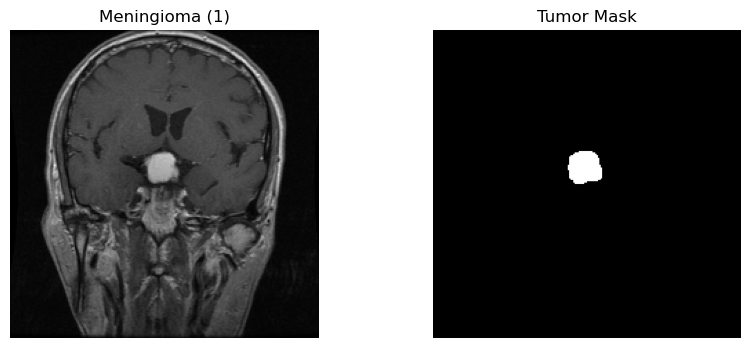

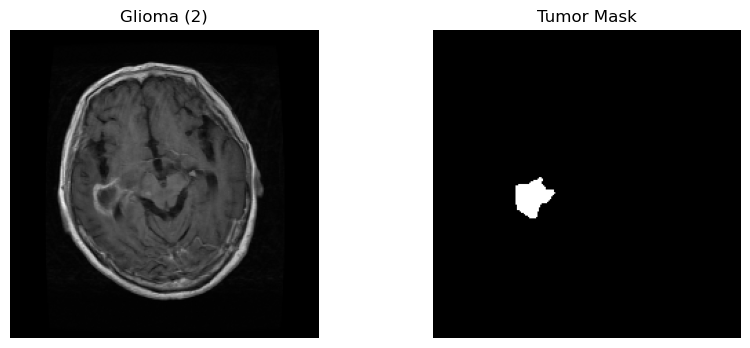

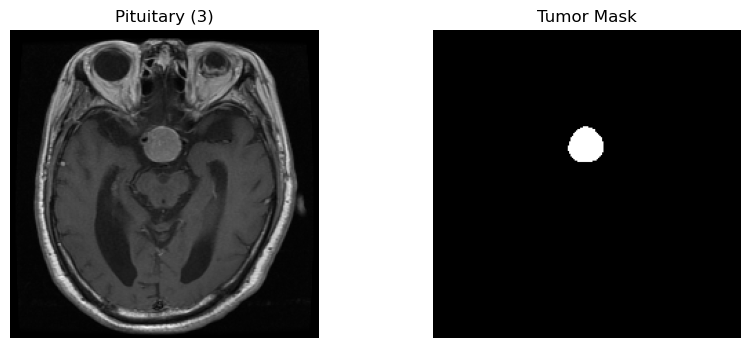

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Map labels to tumor types
label_names = {1: 'Meningioma (1)', 2: 'Glioma (2)', 3: 'Pituitary (3)'}

# Find indices for first occurrence of each tumor type
unique_labels = np.unique(labels)
first_indices = [np.where(labels == label)[0][0] for label in unique_labels]

# Visualize each type
for idx in first_indices:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title(f'{label_names[labels[idx]]}')
    plt.imshow(images[idx].squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Tumor Mask')
    plt.imshow(masks[idx].squeeze(), cmap='gray')
    plt.axis('off')

    plt.show()


## Visualize counts of each tumor

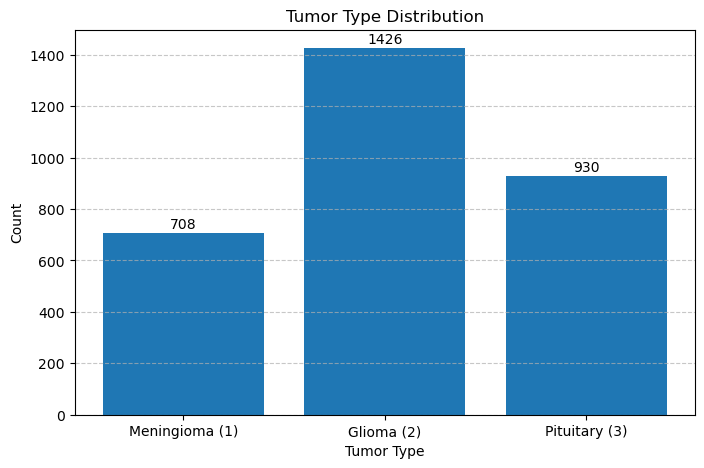

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Map numeric labels to tumor names
label_names = {1: 'Meningioma (1)', 2: 'Glioma (2)', 3: 'Pituitary (3)'}

# Count occurrences of each label
unique_labels, counts = np.unique(labels, return_counts=True)
tumor_types = [label_names[label] for label in unique_labels]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(tumor_types, counts)
plt.title('Tumor Type Distribution')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(count),
             ha='center', va='bottom', fontsize=10)

plt.show()

